Grafos         direcionais e ponderados
=======================================

**Autor:** Daniel R. Cassar



## Grafos



### Grafos direcionais



Os grafos que vimos na aula anterior são os chamados grafos *não-direcionais*. Em um grafo não-direcional, se temos uma aresta entre os vértices $A$ e $B$, então podemos tanto navegar de $A$ para $B$ quanto de $B$ para $A$.

Em um grafo *direcional*, podemos apenas navegar na direção que cada aresta nos permite, e isso é indicado por uma seta. Por conta disso, as arestas em grafos direcionais também podem ser chamadas de *setas*. Uma seta &ldquo;sai&rdquo; de um vértice e &ldquo;chega&rdquo; em outro vértice. Se uma seta sai do vértice $J$ e chega no vértice $P$, então dizemos que $J$ é a cauda e que $P$ é a cabeça da seta.

Quando uma seta liga $J$ e $P$ em apenas uma direção (por exemplo, apenas permite sair de $J$ e chegar em $P$), então esta é uma seta unidirecional. Existem também setas bidirecionais onde é possível navegar entre os vértices da seta em qualquer direção (permite tanto &ldquo;ida&rdquo; quanto &ldquo;volta&rdquo;). Um grafo direcional onde *todas* as setas são bidirecionais é a mesma coisa que um grafo não-direcional.

Grafos direcionais nos dão mais controle na construção de relações entre os objetos que eles contém. Podemos, por exemplo, modelar uma teia alimentar usando grafos direcionais! Neste caso, a direção das setas indica quem é alimento de quem. Para escrever um grafo direcional em Python, use um dicionário onde as chaves são as caudas e os valores são conjuntos contendo as cabeças de cada cauda.



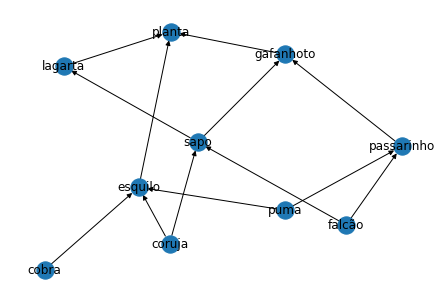

In [2]:
import networkx as nx

teia_alimentar = {
    "puma": {"passarinho", "esquilo"},
    "esquilo": {"planta"},
    "cobra": {"esquilo"},
    "passarinho": {"gafanhoto"},
    "falcão": {"passarinho", "sapo"},
    "gafanhoto": {"planta"},
    "sapo": {"gafanhoto", "lagarta"},
    "coruja": {"sapo", "esquilo"},
    "lagarta": {"planta"},
}

# note que não é mais `nx.Graph`, mas sim `nx.DiGraph`
g = nx.DiGraph(teia_alimentar)

nx.draw(g, with_labels=True)

O sistema de transporte de uma cidade é um grafo direcional pois nem toda rua é mão dupla e nem toda linha de transporte público vai e volta pelo mesmo caminho. Quando um GPS busca um caminho entre o ponto $A$ e o ponto $B$ em uma cidade, ele resolve um problema de navegação em um grafo direcional caso seu método de transporte seja um veículo, ou resolve um problema de navegação em um grafo não-direcional caso seu método de transporte seja caminhada (isso pois não existe uma direção proibida quando caminhamos).



### Grafos ponderados



Em um grafo ponderado, nós atribuímos pesos aos vértices. Vamos ver um exemplo de um grafo contendo o custo de passagens de ônibus entre algumas cidades.



Grafo ponderado não-direcional:


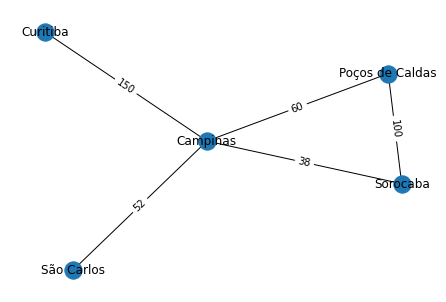

In [3]:
import networkx as nx

# os pesos são atribuidos usando um dicionário
grafo = {
    "Campinas": {
        "Sorocaba": {"custo": 38},
        "São Carlos": {"custo": 52},
        "Curitiba": {"custo": 150},
        "Poços de Caldas": {"custo": 60},
    },
    "Sorocaba": {
        "Campinas": {"custo": 38},
        "Poços de Caldas": {"custo": 100},
    },
    "São Carlos": {
        "Campinas": {"custo": 52},
    },
    "Curitiba": {
        "Campinas": {"custo": 150},
    },
    "Poços de Caldas": {
        "Campinas": {"custo": 60},
        "Sorocaba": {"custo": 100},
    },
}

# note que estamos usando um grafo não-direcional aqui
# estamos fazendo isso pois podemos sempre ir e voltar de ônibus e o preço é o mesmo
g = nx.Graph(grafo)

# esse parâmetro `pos` serve para fixar os vértices
# ele é necessário para plotar corretamente os pesos
pos = nx.spring_layout(g, seed=42)
nx.draw(g, with_labels=True, pos=pos)

# aqui nós plotamos os pesos das arestas
labels = nx.get_edge_attributes(g, "custo")
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

print('Grafo ponderado não-direcional:')

O significado dos pesos irá depender do que estamos modelando com os grafos. No exemplo anterior, os pesos nos mostram o custo de cada trajeto. Em um grafo que representa um passeio em uma cidade, os pesos podem nos indicar o tempo gasto entre sair de um lugar e chegar em outro. Em um grafo de uma molécula química, os pesos podem indicar a energia ou o tipo de ligação entre os átomos.



### Grafos ponderados direcionais



Nada nos impede de criarmos um grafo ponderado e direcional ao mesmo tempo! Não tem segredo criar o dicionário de Python, como você pode ver para o grafo modelando o ciclo da água abaixo. Neste caso, o peso de cada aresta está indicando a porcentagem de água que sai de cada cauda e chega em cada cabeça das setas. Em grafos ponderados direcionais nós vamos usar a palavra `label` para indicar os pesos de cada aresta (isso não é obrigatório, porém nos ajudará na hora de fazer o plot desse grafo).



In [4]:
ciclo_da_agua = {
    "Atmosfera": {
        "Solo": {"label": 29.1},
        "Oceano": {"label": 70},
        "Espaço": {"label": 0.1},
    },
    "Solo": {
        "Plantas": {"label": 80},
        "Oceano": {"label": 20},
    },
    "Oceano": {
        "Atmosfera": {"label": 100},
    },
    "Plantas": {
        "Atmosfera": {"label": 100}
    },
}

Se tentarmos plotar o grafo acima usando o `networkx` vamos ter um problema&#x2026; ele não nos permite indicar conexões entre os mesmos vértices que tenham pesos diferentes&#x2026; vamos plotar para ver que esse é o caso:



Grafo ponderado direcional que deu errado:


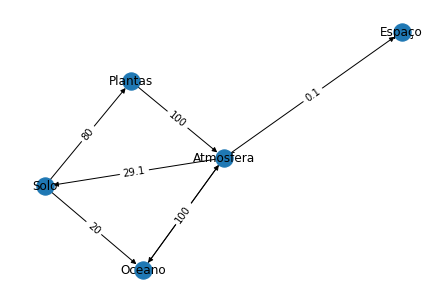

In [5]:
g = nx.DiGraph(ciclo_da_agua)

pos = nx.spring_layout(g, seed=42)
nx.draw(g, with_labels=True, pos=pos)

# usamos a palavra `label` aqui que é o termo dos pesos do nosso dicionário
labels = nx.get_edge_attributes(g, "label")
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

print("Grafo ponderado direcional que deu errado:")

Para exibir esse grafo corretamente vamos usar outra estratégia! Essa estratégia abaixo só funciona corretamente caso os pesos do nosso grafo tenham o nome `label`. Por isso que demos esse nome anteriormente.



In [6]:
# Esse bloco de try/except serve apenas para instalar a biblioteca pydot
# caso ela não esteja instalada.
try:
    import pydot
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install pydot

from IPython.display import Image, display

print("Grafo ponderado direcional que deu certo:")

display(Image(nx.drawing.nx_pydot.to_pydot(g).create_png()))

Grafo ponderado direcional que deu certo:


FileNotFoundError: [WinError 2] "dot" not found in path.

## Navegando grafos direcionais e não-direcionais



### Busca em largura



Existem duas perguntas que usualmente surgem quando temos grafos:

1.  Existe conexão entre o vértice $A$ e o vértice $B$?
2.  Qual é o caminho mais curto entre o vértice $A$ e o vértice $B$? &ldquo;Mais curto&rdquo; neste caso significa aquele que visita menos vértices.

Estas duas perguntas podem ser respondidas usando o algoritmo de *busca em largura*. Vamos ver um exemplo.

Imagina que você tem um senso de direção similar ao do professor de Lógica Computacional (ou seja, quase nulo). Nesse caso, você só sabe *alguns* caminhos pela cidade. Por exemplo: se você está no Dalben só sabe sair de lá e ir para a Ilum e nada mais. Se você está no shopping, só sabe sair de lá e ir até a Ilum ou até o Boteco. Abaixo está a representação do grafo de todos os caminhos que você sabe.



In [ ]:
grafo = {
    "Ilum": {"Flats Ilum", "Dalben", "Shopping"},
    "Flats Ilum": {"Ilum", "Campo de futebol"},
    "Dalben": {"Ilum"},
    "Shopping": {"Ilum", "Boteco", "Campo de futebol"},
    "Campo de futebol": {"Flats Ilum", "Shopping"},
    "Boteco": {"Shopping"},
}

g = nx.Graph(grafo)
nx.draw(g, with_labels=True)

Digamos que você está no boteco degustando uma deliciosa porção de batata frita rústica (com direito a um suculento molho caseiro de maionese temperada) e se lembrou que esqueceu de comprar papel higiênico. Um perigo!! O Dalben está quase fechando então você precisa chegar rápido lá! Você decide que quer fazer o caminho que passa pelo menor número de locais. Por sorte, o algoritmo de *busca em largura* pode te ajudar aqui!

Veja abaixo uma implementação em Python do algoritmo de busca em largura.

**Problema**: identificar a menor distância (em número de vértices) entre um vértice de saída e um vértice de chegada em um grafo direcional ou não-direcional.

**Entrada**:

1.  um grafo representado por um dicionário
2.  vértice inicial
3.  vértice final

**Saída**: retorna um número inteiro representando a menor distância em número de vértices entre o vértice inicial e o final caso haja conexão entre eles. Retorna `False` caso não haja conexão entre eles.

**Algoritmo**:



In [ ]:
def menor_distancia(grafo, onde_estou, onde_quero_chegar):
    """Calcula a menor distância (num. de vértices) de onde estou até onde quero chegar."""

    # Se os dois pontos são iguais, então você já está lá! Distância zero!
    if onde_estou == onde_quero_chegar:
        return 0

    # dicionário para armazenar as distâncias conhecidas
    distancia = {
        onde_estou: 0,
    }

    # criamos as variáveis `fila` e `visitados`. Ambas contém o vértice `onde_estou`
    fila = [onde_estou]
    visitados = [onde_estou]

    # enquanto ainda tivermos itens na fila...
    while len(fila) > 0:

        # o primeiro que entrou na fila sai primeiro! Essa é nossa posição atual.
        posicao = fila.pop(0)

        # iteramos em todos os vizinhos da nossa posição atual
        for vizinho in grafo[posicao]:

            # se o vizinho é onde eu quero chegar, então encontramos a resposta!
            # a resposta será a distância até chegar na posição atual mais 1
            if vizinho == onde_quero_chegar:

                # retornamos ao usuário o que ele pediu
                return distancia[posicao] + 1

            # se o vizinho em questão não foi ainda visitado...
            if vizinho not in visitados:

                # ... incluímos ele na fila...
                fila.append(vizinho)

                # ... e incluímos ele na lista de visitados...
                visitados.append(vizinho)

                # ... e atualizamos nosso dicionário de distâncias pois agora
                # sabemos chegar no vizinho!
                distancia[vizinho] = distancia[posicao] + 1

    # Se chegar aqui é porque não existe nenhum caminho que leve da
    # posição onde_estou até a onde_quero_chegar
    return False

**Teste**:



In [ ]:
grafo = {
    "Ilum": {"Flats Ilum", "Dalben", "Shopping"},
    "Flats Ilum": {"Ilum", "Campo de futebol"},
    "Dalben": {"Ilum"},
    "Shopping": {"Ilum", "Boteco", "Campo de futebol"},
    "Campo de futebol": {"Flats Ilum", "Shopping"},
    "Boteco": {"Shopping"},
}

print("A distância do Boteco até o Dalben é",
      menor_distancia(grafo, "Boteco", "Dalben"))


print()
print("Outros testes:")
print(menor_distancia(grafo, "Boteco", "Shopping"))
print(menor_distancia(grafo, "Boteco", "Flats Ilum"))
print(menor_distancia(grafo, "Boteco", "Campo de futebol"))
print(menor_distancia(grafo, "Boteco", "Boteco"))
print(menor_distancia(grafo, "Boteco", "Parque dos Jequitibás"))

Esse algoritmo garante que você visitará todos os vértices conectados ao seu vértice inicial. Não apenas isso, mas cada vez que ele chega em um vértice ainda não visitado, sabemos que ele chega com a menor distância possível.

O algoritmo de *busca em largura* também funciona para grafos direcionais, desde que todo movimento ocorra apenas nas direções permitidas pelas setas. Vamos testar!



In [ ]:
grafo = {
    "A": {"B"},
    "B": {"C"},
    "C": {"D"},
    "D": {"E"},
    "E": {"A"},
}

g = nx.DiGraph(grafo)
nx.draw(g, with_labels=True)

print("A menor distância entre A e E é:",
      menor_distancia(grafo, "A", "E"))

**Cuidado!!!** O algoritmo de busca em largura *não* funciona para grafos ponderados, sejam eles direcionais ou não! Para isso precisamos de outro algoritmo!



## Exercícios



<font color=&ldquo;blue&rdquo;>Para os exercícios, preencha as células de código vazias abaixo conforme o que o exercício pede. A instrução `import` é apenas permitida para importar os módulos `math`, `random` e `time` nestes exercícios. O módulo `networkx` deve ser importado para plotar os grafos, porém deve ser utilizado apenas para isso.

<font color=&ldquo;blue&rdquo;>Para fins de pontuação, a nota máxima é atingida com 5 resoluções corretas (quaisquer). Resoluções extras são recomendadas para quem quer dar prioridade para aprender programação na Ilum ou para quem quer aumentar a chance de tirar uma nota alta (os pontos se somam até atingir o limite da nota 10). Questões bônus são consideradas questões individuais para fins da pontuação.



### Grafo direcional não-ponderado



Crie um grafo direcional não-ponderado com pelo menos 5 vértices que modele um conceito/fenômeno/modelo que tenha relevância científica (não vale teias alimentares pois esse foi o exemplo dado). Justifique a relevância científica do seu grafo. Não é necessário que seu grafo seja extensivo, ou seja, não é necessário que ele descreva seu conceito/fenômeno/modelo na sua totalidade. O importante aqui é se desafiar cientificamente e criativamente para representar algo em um grafo. Plote seu grafo!



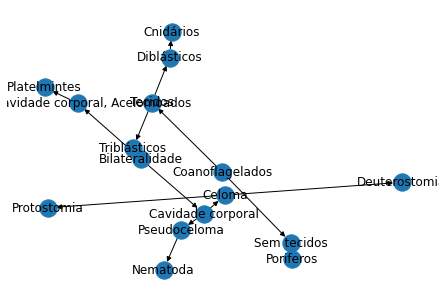

In [9]:
metazoa = {
    "Coanoflagelados": {"Sem tecidos", "Tecidos"},
    "Sem tecidos": {"Poriferos"},
    "Tecidos": {"Diblásticos", "Triblásticos"},
    "Diblásticos": {"Cnidários"},
    "Triblásticos": {"Bilateralidade"},
    "Bilateralidade": {"Sem cavidade corporal, Acelomoados", "Cavidade corporal"},
    "Sem cavidade corporal, Acelomoados": {"Platelmintes"},
    "Cavidade corporal": {"Pseudoceloma", "Celoma"},
    "Pseudoceloma": {"Nematoda"},
    "Celoma": {"Protostomia", "Deuterostomia"},
}


esqueminha = nx.DiGraph(metazoa)

nx.draw(esqueminha, with_labels=True)

Justificativa da relevância científica:



   <d>Sinapormofias são uma forma de esquematizar táxons biológicos, como no exemplo acima, que mostra a complexidade dos metazoa, que é formado por organismos eucarióticos multicelulares, ou simplismente, o reino animal. No grafo estão relacionados as caracteristicas que separam as formas de vida, baseando-se na sua morfologia. </d>

<font color=&ldquo;blue&rdquo;>Ponto bônus: dê 5 exemplos de conceitos/fenômenos/modelos que poderiam ser representados por grafos direcionais não-ponderados. Não vale exemplos discutidos no texto ou o exemplo utilizado para resolver esta questão.



1. Ciclo de Krebs (Processo presente na respiração celular)
2. Ciclo do Carbono (Processo biológico, químico e geológico da circulação de carbono entre organismos vivos e o meio ambinete)
3. Extração de etanol de primeira e segunda geração (Processo físico e químico dividido por etapas)
4. Ciclo de Carnot (Transformação termodinamica isotérmica de um gás)
5. Regulação energética da célula, ativada por proteína quinase (Ciclo AMPK)

### Grafo ponderado não-direcional



Crie um grafo ponderado não-direcional com pelo menos 5 vértices que modele um conceito/fenômeno/modelo que tenha relevância científica (não vale sistema de transporte de cidades pois esse foi o exemplo dado). Justifique a relevância científica do seu grafo. Não é necessário que seu grafo seja extensivo, ou seja, não é necessário que ele descreva seu conceito/fenômeno/modelo na sua totalidade. O importante aqui é se desafiar cientificamente e criativamente para representar algo em um grafo. Plote seu grafo!



In [12]:
reação_dupla_troca = {
    "NaOH": {
        "Na+": {"label": +1},
        "OH-": {"label": -1},
    },
    "NaOH_": {
        "Na_+": {"label": +1},
        "OH_-": {"label": -1},
    },
    "H2SO4": {
        "H2_+": {"label": +1},
        "H2+": {"label": +1},
        "SO4_2-": {"label": -2},
    },
    "Na2SO4": {
        "Na+": {"label": +1},
        "Na_+": {"label": +1},
        "SO4_2-": {"label": -2},
    },
    "H2O_": {
        "H2+": {"label": +1}, 
        "OH-": {"label": -1},
    },
    "H2O": {
        "H2_+": {"label": +1}, 
        "OH_-": {"label": -1},
    }
}

In [17]:
try:
    import pydot
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install pydot

from IPython.display import Image, display

neutralização = nx.Graph(reação_dupla_troca)
display(Image(nx.drawing.nx_pydot.to_pydot(neutralização).create_png()))

FileNotFoundError: [WinError 2] "dot" not found in path.

Justificativa da relevância científica:



Esse tipo de reação química é chamada de dupla troca, ela ocorre principalmente entre ácidos e bases, neutralizando-os. Os seus produtos serão sempre sal e água
Por ser uma reação simples, direta e bem definida, ela é usada em muitas tecnicas de análise química quantitativa, específicamente as volumétricas. 

<font color=&ldquo;blue&rdquo;>Ponto bônus: dê 5 exemplos de conceitos/fenômenos/modelos que poderiam ser representados por grafos ponderados não-direcionais. Não vale exemplos discutidos no texto ou o exemplo utilizado para resolver esta questão.



### Grafo ponderado direcional



Crie um grafo ponderado direcional com pelo menos 5 vértices que modele um conceito/fenômeno/modelo que tenha relevância científica (não vale o ciclo de moléculas de interesse biológico pois esse foi o exemplo dado). Justifique a relevância científica do seu grafo. Não é necessário que seu grafo seja extensivo, ou seja, não é necessário que ele descreva seu conceito/fenômeno/modelo na sua totalidade. O importante aqui é se desafiar cientificamente e criativamente para representar algo em um grafo. Plote seu grafo!



In [14]:
pilha_do_dani = {
    "Zinco_m": {
        "Zn_2+": {"label": +2},
        "e-": {"label": -1},
    },
    "Solução_Cu": {
        "Cu_2+": {"label": +2},
        "NO3_-": {"label": +1},
        "NO3-": {"label": +1},
    },
    "Cobre_m": {
        "Cu_2+": {"label": +2},
        "e-": {"label": -1},
    },
    "Solução_Zn": {
        "Zn_2+": {"label": +2},
        "No3_-": {"label": +1},
        "No3-": {"label": +1},
    },
    
}

In [18]:
try:
    import pydot
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install pydot

from IPython.display import Image, display

pilha_zn_cu = nx.DiGraph(pilha_do_dani)
display(Image(nx.drawing.nx_pydot.to_pydot(pilha_zn_cu).create_png()))

FileNotFoundError: [WinError 2] "dot" not found in path.

Justificativa da relevância científica:



A Pilha de Daniell é um modelo que representa um sistema elétrico, que ocorre de forma espontânea, através da oxiredução de dois eletrodos, e um fluxo de elétrons que corre de um para outro por um fio metálico. Esse tipo de sistema é usado na fabricação de pilhas e baterias. Um processo similar, elitrólise, ocorrer de forma induzida, com o mesmo modelo de transferência de elétrons, que é muito utilizado, por exemplo, em soldagens.

<font color=&ldquo;blue&rdquo;>Ponto bônus: dê 5 exemplos de conceitos/fenômenos/modelos que poderiam ser representados por grafos ponderados direcionais. Não vale exemplos discutidos no texto ou o exemplo utilizado para resolver esta questão.



### Direcional ou não-direcional, eis a questão



Crie uma função que recebe um grafo (representado por um dicionário de Python) e retorna `True` caso esse grafo seja direcional ou `False` caso ele seja não-direcional.



### A matriz de adjacência de grafos direcionais e ponderados



A matriz de adjacência é uma forma de representar um grafo usando uma matriz. A matriz de adjacência $A$ de um grafo direcional e ponderado tem $n$ linhas e $n$ colunas, onde $n$ é o número de vértices do grafo. Para quaisquer dois vértices $u$ e $v$ do grafo, o valor de $A[u,v]$ é o *peso da aresta* caso exista uma seta saindo de $u$ e chegando em $v$ ou vale 0 caso contrário. Sua tarefa é construir a matriz de adjacência do grafo do ciclo da água apresentado do texto.

Essa questão vale apenas metade caso você faça a matriz &ldquo;na mão&rdquo;, literalmente escrevendo a matriz como uma lista de listas de Python. Se for resolver desta forma, não se esqueça de indicar com uma lista a ordem das linhas e colunas da sua matriz (ou seja, que personagem cada linha e coluna representam).

A questão vale a pontuação máxima caso você construa uma função que recebe um grafo qualquer na forma de dicionário e retorna a matriz de adjacência e a ordem das linhas e colunas. Não se esqueça de testar sua função com o grafo do ciclo da água.



### Criando um grafo a partir de uma matriz de adjacência



Crie uma função que recebe uma matriz de adjacência (representada por uma lista de listas) e uma lista com o nome dos vértices (na ordem da matriz de adjacência) e retorna um dicionário de Python que representa o grafo da matriz recebida. Se você identificar que a matriz recebida representa um grafo ponderado, use o nome `peso` para representar o peso das arestas no seu dicionário. Teste sua função e faça o plot do grafo obtido.



### Caminhando e cantando e seguindo o grafo



Crie uma função que recebe um grafo não-ponderado (pode ser direcional ou não-direcional) e um vértice qualquer desse grafo. A função retorna para o usuário duas informações: o vértice mais distante do vértice de entrada e a distância até ele. Se houver empate, fica a seu critério escolher se irá retornar apenas uma resposta válida ou se irá retornar todas as respostas válidas com a maior distância (deixe claro qual opção escolheu!).



In [20]:
 """ Função adaptada da atividade anterior """
    
def dist(grafo, vert_qlqr, vert_dist):
    
    if vert_qlqr == vert_dist: # Caso o grafo só tenha um vertice 
        return 0

    dist_min = {vert_qlqr: 0,} # Menor distancia possivel/Armarzenar a distancia

    # armazanar os pontos visitados. 
    local_atual = [vert_qlqr] 
    pont_pass = [vert_qlqr]

    while len(local_atual) > 0: # Enquanto o local_atual não for a chegada  
        vertice = local_atual.pop(0)   # Novo local_atual
        for p in grafo[vertice]: # Para cada chave.....
            if p == vert_dist:
                return dist_min[vertice] + 1 
            
            if p not in pont_pass:  # Para os demais vértices 
                local_atual.append(p)
                pont_pass.append(p)
                dist_min[p] = dist_min[vertice] + 1
    return False

Dani, não te encotrei hoje (quarta), mas gostaria de discutir esta função. Tentei adaptar a função que calcula a menor distancia para este exercício pois achei o algoritimo parecido, mas não conseguir desenvolver bem.

<font color=&ldquo;blue&rdquo;>Ponto bônus: já que você sabe calcular o vértice mais distante de um vértice qualquer, escreva uma função que recebe um grafo não-ponderado (direcional ou não) e retorna os dois vértices mais distantes deste grafo e a distância entre eles. Novamente, fica a seu critério escolher se irá retornar apenas uma resposta válida ou todas as respostas válidas (deixe claro qual opção escolheu!). **Dica**: se o grafo for não-direcional, então a distância entre o vértice $A$ e o vértice $B$ é a mesma distância entre o vértice $B$ e o vértice $A$. Considere usar esse conhecimento na sua implementação.

